In [ ]:
#librarias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# importar datasets
df = pd.read_csv("dataset_rendimiento_academico.csv")

In [ ]:
# informacion de las columnas o variables a trabajar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estudiante_ID           200 non-null    int64  
 1   Edad                    200 non-null    int64  
 2   Genero                  200 non-null    object 
 3   Nivel_Academico         200 non-null    object 
 4   Horas_Estudio_Semana    200 non-null    float64
 5   Promedio_Academico      200 non-null    float64
 6   Satisfaccion_Ensenanza  200 non-null    int64  
 7   Asistencia_Clases       200 non-null    float64
 8   Estrés_Nivel            200 non-null    object 
 9   Uso_Biblioteca          200 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ KB


In [ ]:
#vizualizar los datos
df.head()

,Estudiante_ID,Edad,Genero,Nivel_Academico,Horas_Estudio_Semana,Promedio_Academico,Satisfaccion_Ensenanza,Asistencia_Clases,Estrés_Nivel,Uso_Biblioteca
0,1,23,Masculino,Pregrado,16.708780,3.224383,3,78.337606,Alto,Nunca
1,2,20,Femenino,Pregrado,24.380854,2.990093,4,100.000000,Medio,Frecuente
2,3,21,Masculino,Pregrado,19.752119,3.998201,2,67.623833,Medio,Ocasional
3,4,23,Femenino,Pregrado,12.115482,2.986350,3,58.614329,Medio,Frecuente
4,5,19,Femenino,Pregrado,10.507927,3.542940,2,90.280173,Alto,Frecuente


In [6]:

#verificacion de datos incompleto o nulos
df.isnull().sum()

Estudiante_ID             0
Edad                      0
Genero                    0
Nivel_Academico           0
Horas_Estudio_Semana      0
Promedio_Academico        0
Satisfaccion_Ensenanza    0
Asistencia_Clases         0
Estrés_Nivel              0
Uso_Biblioteca            0
dtype: int64

## Verificación de datos nulos
El resultado muestra que **no existen valores nulos en el conjunto de datos**.  
Esto garantiza que todas las observaciones están completas y que **no es necesario aplicar técnicas de imputación o eliminación de registros faltantes** antes del análisis.


In [ ]:
#Medicion de Rango de los datos
rango = df["Horas_Estudio_Semana"].max() - df["Horas_Estudio_Semana"].min()
print(rango.round())

28.0


##  Rango
El rango de los datos es de **28 horas**, lo que indica que entre el estudiante que dedica menos tiempo al estudio y el que más estudia existe una diferencia de 28 horas.  
Este resultado sugiere una **alta variabilidad en los hábitos de estudio**, donde algunos estudiantes son significativamente menos activos que otros.


In [ ]:
#Medicion de Desviacion Estandar de los datos

desviacion_estandar = df["Horas_Estudio_Semana"].std()
print(desviacion_estandar.round())

5.0


##  Desviación estándar
La desviación estándar es de **5 horas**, lo que indica que, en promedio, el tiempo de estudio de los estudiantes se desvía 5 horas respecto al promedio general.  
Esto sugiere una **moderada variabilidad** en los hábitos de estudio: algunos estudiantes estudian más o menos que la media, pero sin diferencias extremas.


In [ ]:
#Medicion de Varianza de los datos
variancia =df["Horas_Estudio_Semana"].var()
print(variancia.round())

26.0


##  Varianza
La varianza es de **26**, lo que indica el grado de dispersión de las horas de estudio respecto a la media.  
Este valor confirma que existe una **variabilidad moderada** entre los estudiantes, ya que el tiempo que cada uno dedica al estudio no es uniforme.


Outliers detectados: 1 registros


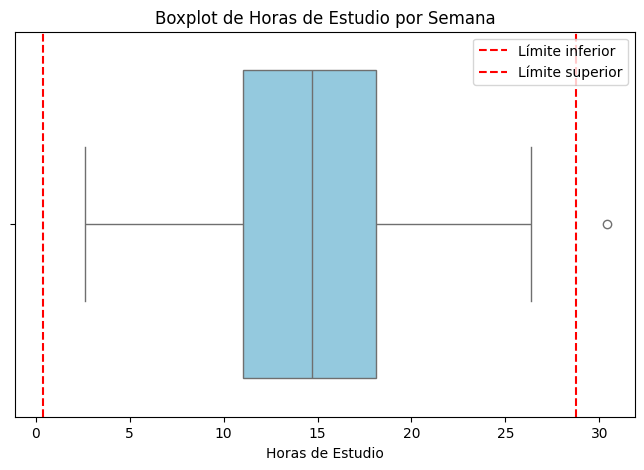

Límite inferior: 0.4
Límite superior: 28.8
Valores outliers:
92    30.4
Name: Horas_Estudio_Semana, dtype: float64


In [10]:
# Calcular cuartiles e IQR
q1 = df["Horas_Estudio_Semana"].quantile(0.25)
q3 = df["Horas_Estudio_Semana"].quantile(0.75)
IQR = q3 - q1 # = 7

# detectar outliers
limite_inferior = q1 - 1.5 * IQR
limite_superior = q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df["Horas_Estudio_Semana"] < limite_inferior) | (df["Horas_Estudio_Semana"] > limite_superior)]
print(f"Outliers detectados: {len(outliers)} registros")

# Graficar boxplot con límites
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Horas_Estudio_Semana"], color='skyblue')
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior')
plt.title("Boxplot de Horas de Estudio por Semana")
plt.xlabel("Horas de Estudio")
plt.legend()
plt.show()

print("Límite inferior:", limite_inferior.round(1))
print("Límite superior:", limite_superior.round(1))
print("Valores outliers:")
print(outliers["Horas_Estudio_Semana"].round(1))


##  Rango Intercuartílico (IQR)
El rango intercuartílico (IQR) es de **7 horas**, lo que indica que el 50% central de los estudiantes estudia dentro de un rango de 7 horas semanales.  
Además, se detectó **1 registro como valor atípico (outlier)**, lo que sugiere que solo un estudiante presenta un patrón de estudio muy diferente al resto del grupo.  
Esto refleja que, en general, los datos son consistentes, con una dispersión moderada y pocos valores extremos.


0